## Loading the text
* We are using a short story named The Verdict for tokenization
* We are loading it in string variable raw_text

In [5]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


## Using re library
* Below snippet shows how to use re library to extract tokens from a paragraph/sentence.

In [6]:
import re
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


## Tokenizing the verdict
* We will tokenize the above loaded raw_text here.

In [7]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed))
print(preprocessed[:30])

4690
['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


## Converting the tokens to token IDs 
* We will convert the above tokens which are currently strings to integer representation.
* To map the previously generated tokens into token IDs, we have to build a vocabulary first
* We will create a list of all unique tokens and sort them alphabetically to determine the vocabulary size.


In [8]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(vocab_size)

1130


* After determining that the vocabulary size is 1,130 via this code, we create the vocabulary

In [9]:
vocab = {token:integer for integer,token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


* Our next goal is to apply this vocabulary to convert new text into token IDs
* For the same we use the already defined tokenizer Class.
* We will test that class first with some test cases.

In [10]:
from tokenizerClass import SimpleTokenizerV1
tokenizer = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know," 
       Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)
print(tokenizer.decode(ids))

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]
" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


* Let’s now apply it to a new text sample not contained in the training set.
* Below statement gives us keyError, the problem is that the word “Hello” was not used in the “The Verdict” short story. Hence, it is not contained in the vocabulary.

In [11]:
text = "Hello, do you like tea?"
print(tokenizer.encode(text))

KeyError: 'Hello'

## What can be done?
* We need to modify the tokenizer to handle unknown words.
* We also need to address the usage and addition of special context tokens that can enhance a model’s understanding of context or other relevant information in the text.
* We will modify the vocabulary and tokenizer, SimpleTokenizerV2(implemented in tokenizerClass.py), to support two new tokens, <|unk|> and <|endoftext|>.
* We can modify the tokenizer to use an <|unk|> token if it encounters a word that is not part of the vocabulary.


In [12]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}

print(len(vocab.items()))

1132


In [13]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [15]:
from tokenizerClass import SimpleTokenizerV2

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)

tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text))
print(tokenizer.decode(tokenizer.encode(text)))


Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.
[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]
<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


* There might be additional special tokens based on LLM like [BOS] (beginning of sequence), [EOS] (end of sequence).
* The tokenizer used for GPT models does not need any of these tokens; it only uses an <|endoftext|> token for simplicity.
* The tokenizer used for GPT models also doesn’t use an <|unk|> token for out-of-vocabulary words. Instead, GPT models use a byte pair encoding tokenizer, which breaks words down into subword units

### Byte Pair Encoding (BPE)
* The BPE tokenizer was used to train LLMs such as GPT-2, GPT-3, and the original model used in ChatGPT.
* We will use an existing Python open source library called tiktoken (https://github.com/openai/tiktoken) which implements the BPE algorithm very efficiently based on source code in Rust. (Since implementing BPE is complex).
* The algorithm underlying BPE breaks down words that aren’t in its predefined vocabulary into smaller subword units or even individual characters, enabling it to handle out-of-vocabulary words.

In [16]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")

text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

strings = tokenizer.decode(integers)
print(strings)


[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]
Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


### Data Sampling with sliding Window
* We need data so we get it from available text by making the parts of sentence as input and next word as output.

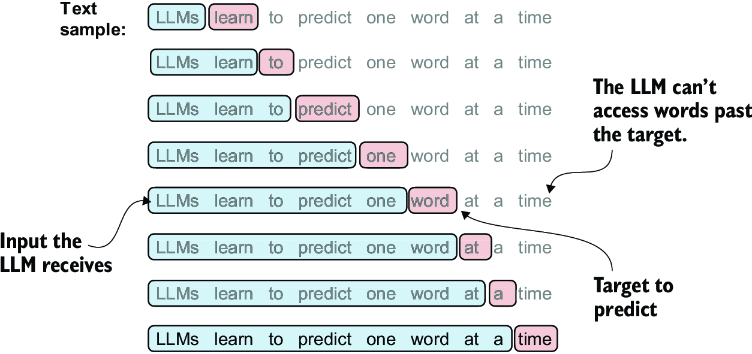

In [17]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

enc_sample = enc_text[50:]

context_size = 4         #1
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y: {y}")


5145
x: [290, 4920, 2241, 287]
y: [4920, 2241, 287, 257]


In [18]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(context, "---->", desired)


[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [19]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))


 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


* There’s only one more task before we can turn the tokens into embeddings: implementing an efficient data loader that iterates over the input dataset and returns the inputs and targets as PyTorch tensors, which can be thought of as multidimensional arrays.
* For the efficient data loader implementation, we will use PyTorch’s built-in Dataset and DataLoader classes.


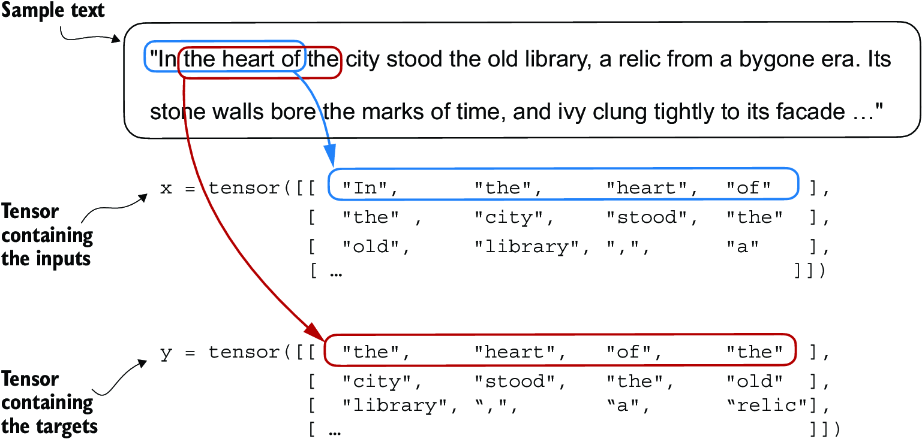

In [21]:
from gptDataSetClass import GPTDatasetV1
from torch.utils.data import DataLoader

def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):
    tokenizer = tiktoken.get_encoding("gpt2")                         #1
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)   #2
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,     #3
        num_workers=num_workers     #4
    )

    return dataloader

In [22]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)
data_iter = iter(dataloader)      #1
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


* Below example shows how stride works, stride = 1 so data shifts by 1 position.

In [23]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [24]:
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=4, stride=4,
    shuffle=False
)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


#### Creating token embeddings

* The last step in preparing the input text for LLM training is to convert the token IDs into embedding vectors.
* This initialization serves as the starting point for the LLM’s learning process.
* A continuous vector representation, or embedding, is necessary since GPT-like LLMs are deep neural networks trained with the backpropagation algorithm.

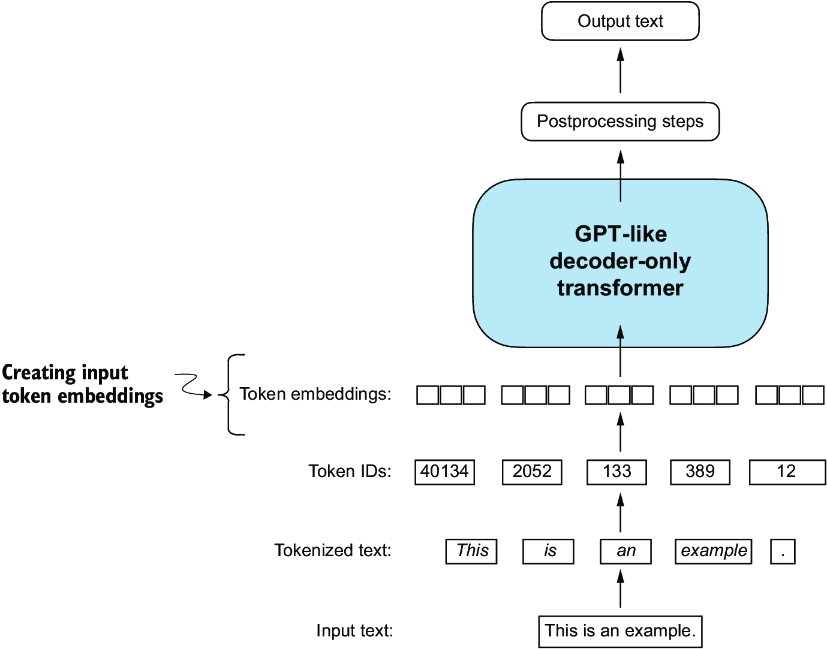

**Note** : - Image is from the book Build a Large Language Model (From Scratch)by Sebastian Raschka


* Let's see how the token ID to embedding vector conversion works with a hands-on example.

In [27]:
import torch
input_ids = torch.tensor([2, 3, 5, 1])
vocab_size = 6
output_dim = 3
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

print(embedding_layer(torch.tensor([3])))

print(embedding_layer(input_ids))


Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)
tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)
tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


#### Encoding word positions
* In principle, token embeddings are a suitable input for an LLM. However, a minor shortcoming of LLMs is that their self-attention mechanism doesn’t have a notion of position or order for the tokens within a sequence. 
* In principle, the deterministic, position-independent embedding of the token ID is good for reproducibility purposes. However, since the self-attention mechanism of LLMs itself is also position-agnostic, it is helpful to inject additional position information into the LLM.
* To achieve this, we can use two broad categories of position-aware embeddings: relative positional embeddings and absolute positional embeddings. 
* Absolute positional embeddings are directly associated with specific positions in a sequence. For each position in the input sequence, a unique embedding is added to the token’s embedding to convey its exact location.

* 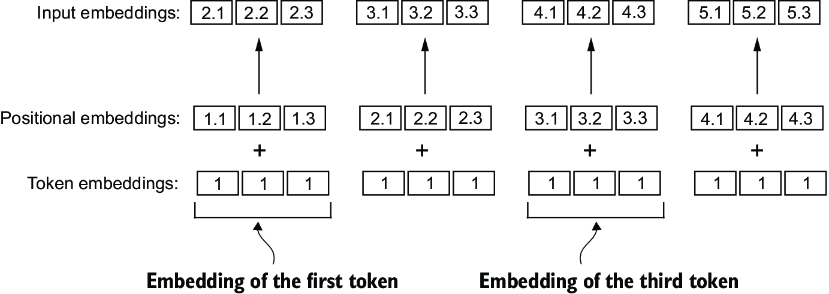

* Instead of focusing on the absolute position of a token, the emphasis of relative positional embeddings is on the relative position or distance between tokens. This means the model learns the relationships in terms of “how far apart” rather than “at which exact position.” 
* The advantage here is that the model can generalize better to sequences of varying lengths, even if it hasn’t seen such lengths during training.


In [29]:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
   stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)


token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)


Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])
torch.Size([8, 4, 256])


In [31]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)


torch.Size([4, 256])
torch.Size([8, 4, 256])


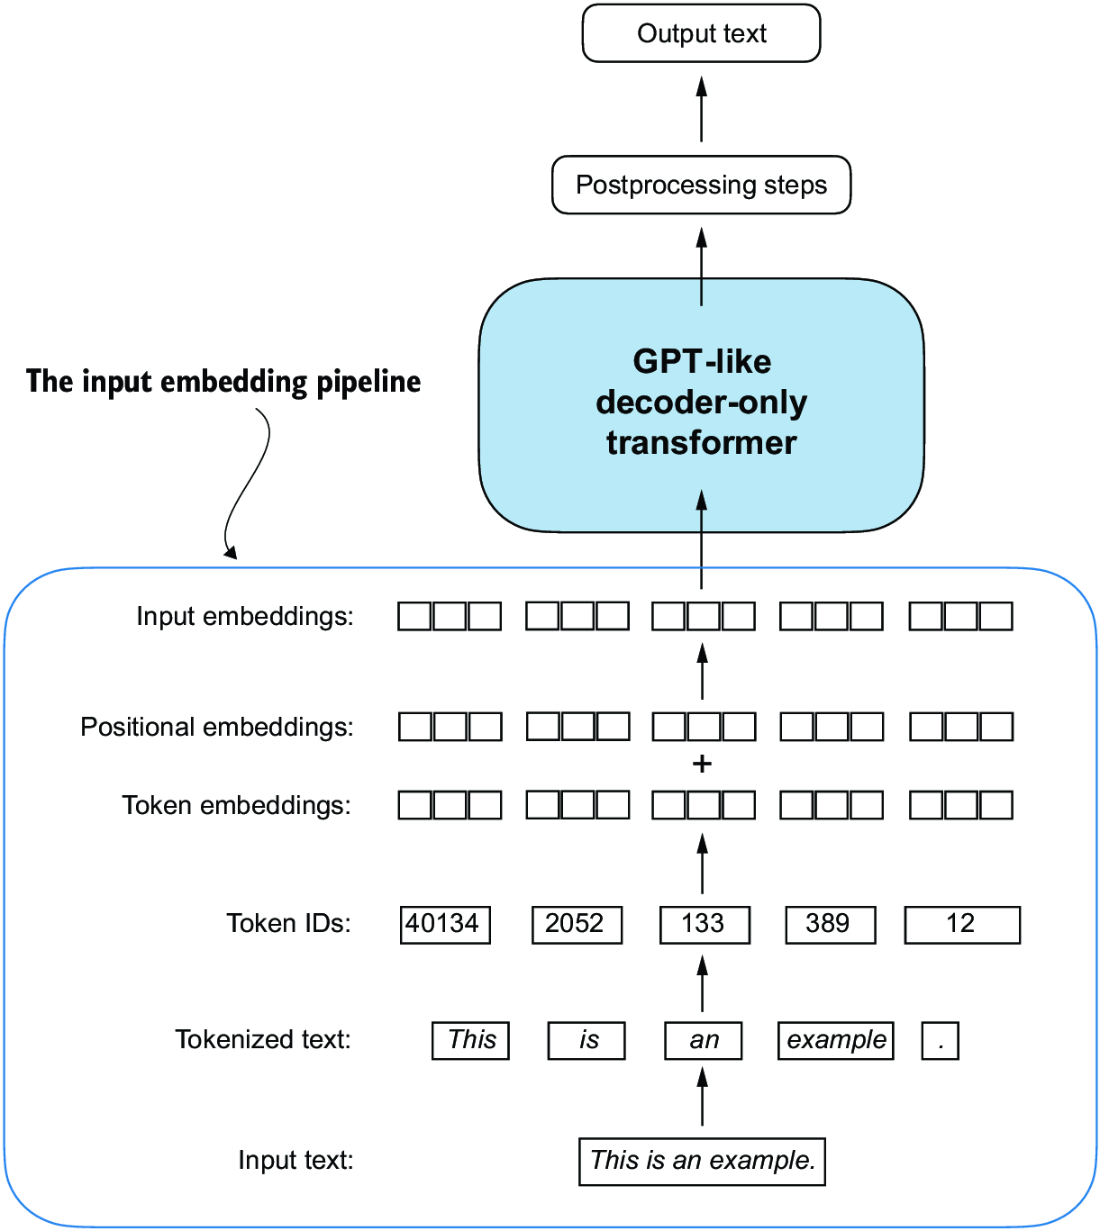



* LLMs require textual data to be converted into numerical vectors, known as embeddings, since they can’t process raw text. Embeddings transform discrete data (like words or images) into continuous vector spaces, making them compatible with neural network operations.
* As the first step, raw text is broken into tokens, which can be words or characters. Then, the tokens are converted into integer representations, termed token IDs.
* Special tokens, such as <|unk|> and <|endoftext|>, can be added to enhance the model’s understanding and handle various contexts, such as unknown words or marking the boundary between unrelated texts.
* The byte pair encoding (BPE) tokenizer used for LLMs like GPT-2 and GPT-3 can efficiently handle unknown words by breaking them down into subword units or individual characters.
* We use a sliding window approach on tokenized data to generate input–target pairs for LLM training.
Embedding layers in PyTorch function as a lookup operation, retrieving vectors corresponding to token IDs. The resulting embedding vectors provide continuous representations of tokens, which is crucial for training deep learning models like LLMs.
* While token embeddings provide consistent vector representations for each token, they lack a sense of the token’s position in a sequence. To rectify this, two main types of positional embeddings exist: absolute and relative. OpenAI’s GPT models utilize absolute positional embeddings, which are added to the token embedding vectors and are optimized during the model training.

